# Movie Ratings Analysis
## Task 2 - Data Science Internship at Hex Softwares

**Objective:** Analyze movie ratings data to uncover meaningful trends and patterns through statistical analysis and visualization.

**Author:** Data Science Intern  
**Date:** February 2026

---

## 1. Environment Setup

Import all necessary libraries and configure visualization settings.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")

✓ All libraries imported successfully
✓ Pandas version: 2.2.2
✓ NumPy version: 1.26.4


## 2. Data Loading

Load the IMDB movie dataset and perform initial inspection.

In [2]:
# Load the dataset
# Using a curated IMDB dataset with comprehensive movie information
data_url = "https://raw.githubusercontent.com/danielgrijalva/movie-stats/master/movies.csv"

try:
    data = pd.read_csv(data_url)
    print("✓ Dataset loaded successfully")
    print(f"✓ Total records: {len(data):,}")
    print(f"✓ Total features: {len(data.columns)}")
except Exception as e:
    print(f"✗ Error loading dataset: {e}")

✓ Dataset loaded successfully
✓ Total records: 7,668
✓ Total features: 15


### 2.1 Display First 10 Rows

Examine the structure and content of the dataset.

In [3]:
# Display first 10 rows as required
print("First 10 rows of the dataset:")
print("=" * 100)
data.head(10)

First 10 rows of the dataset:


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.40,123000.00,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.00,39754601.00,Paramount Pictures,95.00
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.90,188000.00,John Landis,Dan Aykroyd,John Belushi,United States,27000000.00,115229890.00,Universal Pictures,133.00
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.20,330000.00,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.00,23402427.00,Chartoff-Winkler Productions,129.00
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.80,101000.00,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.00,108185706.00,Dovemead Films,127.00
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.00,10000.00,Walter Hill,Bill Bryden,David Carradine,United States,10000000.00,15795189.00,United Artists,100.00


## 3. Data Exploration

Understand the dataset structure, data types, and unique values.

In [4]:
# Dataset information - data types and memory usage
print("Dataset Information:")
print("=" * 100)
data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
# Unique value counts for each column
print("\nUnique Values per Column:")
print("=" * 100)
unique_counts = data.nunique().sort_values(ascending=False)
print(unique_counts)

# Identify categorical columns (columns with relatively few unique values)
categorical_threshold = 50
categorical_cols = unique_counts[unique_counts < categorical_threshold].index.tolist()
print(f"\n✓ Identified {len(categorical_cols)} potential categorical columns:")
print(categorical_cols)


Unique Values per Column:
name        7512
gross       7472
writer      4535
released    3414
director    2949
star        2814
company     2385
votes        936
budget       413
runtime      138
score         72
country       59
year          41
genre         19
rating        12
dtype: int64

✓ Identified 3 potential categorical columns:
['year', 'genre', 'rating']


## 4. Data Cleaning & Preprocessing

Handle missing values, duplicates, and data quality issues.

### 4.1 Missing Values Analysis

Missing Values Analysis:


  Column  Missing_Count  Missing_Percentage
  budget           2171               28.31
   gross            189                2.46
  rating             77                1.00
 company             17                0.22
 runtime              4                0.05
   score              3                0.04
   votes              3                0.04
  writer              3                0.04
 country              3                0.04
released              2                0.03
    star              1                0.01


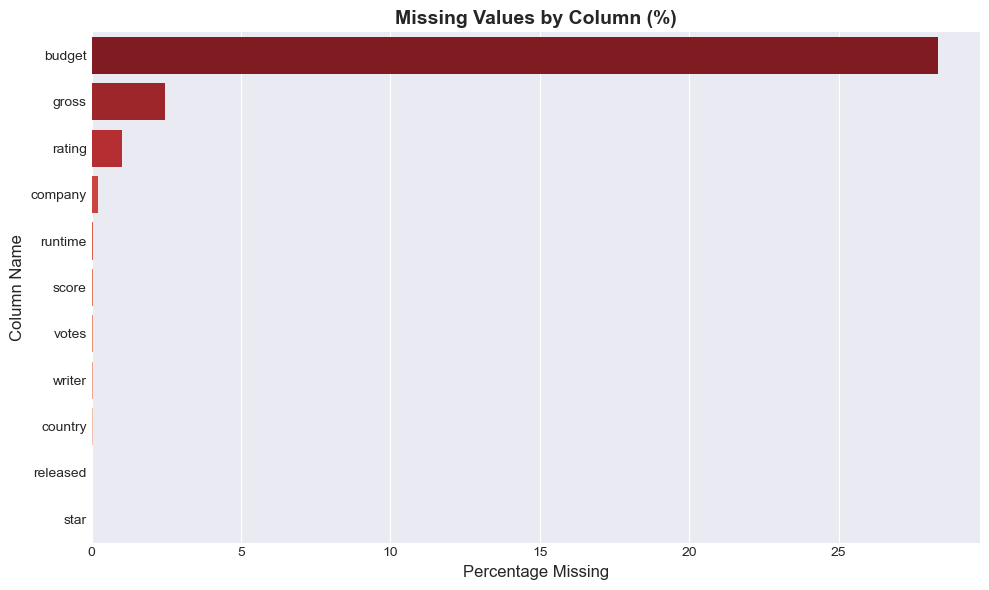

In [6]:
# Detect missing values
print("Missing Values Analysis:")
print("=" * 100)

missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_summary) > 0:
    print(missing_summary.to_string(index=False))
else:
    print("✓ No missing values detected!")

# Visualize missing values
if len(missing_summary) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_summary, x='Missing_Percentage', y='Column', palette='Reds_r')
    plt.title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Percentage Missing', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.tight_layout()
    plt.savefig('../visualizations/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()

### 4.2 Handling Missing Values

Strategy: Drop rows if missing data is ≤7%, otherwise apply appropriate imputation.

In [7]:
# Store original size
original_size = len(data)
print(f"Original dataset size: {original_size:,} rows")

# Apply 7% threshold rule
threshold = 7.0

# Columns to drop rows (missing <= 7%)
cols_to_drop_rows = missing_summary[missing_summary['Missing_Percentage'] <= threshold]['Column'].tolist()

if cols_to_drop_rows:
    print(f"\n✓ Dropping rows with missing values in: {cols_to_drop_rows}")
    data = data.dropna(subset=cols_to_drop_rows, axis=0)

# Columns to impute (missing > 7%)
cols_to_impute = missing_summary[missing_summary['Missing_Percentage'] > threshold]['Column'].tolist()

if cols_to_impute:
    print(f"\n✓ Imputing values for: {cols_to_impute}")
    for col in cols_to_impute:
        if data[col].dtype in ['float64', 'int64']:
            # Numerical: use median
            data[col].fillna(data[col].median(), inplace=True)
            print(f"  - {col}: filled with median ({data[col].median():.2f})")
        else:
            # Categorical: use mode
            data[col].fillna(data[col].mode()[0], inplace=True)
            print(f"  - {col}: filled with mode ({data[col].mode()[0]})")

print(f"\n✓ Cleaned dataset size: {len(data):,} rows")
print(f"✓ Rows removed: {original_size - len(data):,} ({((original_size - len(data)) / original_size * 100):.2f}%)")

# Verify no missing values remain
remaining_missing = data.isnull().sum().sum()
print(f"\n✓ Remaining missing values: {remaining_missing}")

Original dataset size: 7,668 rows

✓ Dropping rows with missing values in: ['gross', 'rating', 'company', 'runtime', 'score', 'votes', 'writer', 'country', 'released', 'star']

✓ Imputing values for: ['budget']
  - budget: filled with median (21800000.00)

✓ Cleaned dataset size: 7,412 rows
✓ Rows removed: 256 (3.34%)

✓ Remaining missing values: 0


### 4.3 Duplicate Detection and Removal

In [8]:
# Detect duplicates
print("Duplicate Analysis:")
print("=" * 100)

duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"✓ Removing {duplicate_count} duplicate rows...")
    data = data.drop_duplicates()
    print(f"✓ Dataset size after removing duplicates: {len(data):,} rows")
else:
    print("✓ No duplicate rows found!")

# Reset index after cleaning
data = data.reset_index(drop=True)
print("\n✓ Index reset complete")

Duplicate Analysis:
Total duplicate rows: 0
✓ No duplicate rows found!

✓ Index reset complete


## 5. Statistical Analysis

Generate comprehensive statistical summaries and identify key insights.

### 5.1 Comprehensive Statistical Summary

In [9]:
# Generate comprehensive statistics for all columns
print("Comprehensive Statistical Summary:")
print("=" * 100)
data.describe(include='all').T

Comprehensive Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,7412,7267,Nobody's Fool,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7412,12,R,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,7412,18,Comedy,2182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,7412.00,NaN,NaN,NaN,2000.64,11.03,1980.00,1991.00,2001.00,2010.00,2020.00
released,7412,3292,"October 4, 1991 (United States)",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,7412.00,NaN,NaN,NaN,6.40,0.96,1.90,5.80,6.50,7.10,9.30
votes,7412.00,NaN,NaN,NaN,90763.57,165346.64,105.00,10000.00,34000.00,96000.00,2400000.00
director,7412,2816,Woody Allen,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
writer,7412,4354,Woody Allen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star,7412,2652,Nicolas Cage,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5.2 Rating Statistics

In [10]:
# Identify the rating column (common names: rating, score, imdb_rating, etc.)
# NEW CODE (correct)
# Note: 'rating' column contains certifications (R, PG, PG-13), 'score' contains numerical ratings
rating_col = None
for col in data.columns:
    if 'score' in col.lower():
        rating_col = col
        break
    elif 'imdb' in col.lower() and 'rating' in col.lower():
        rating_col = col
        break

if rating_col:
    print(f"Rating Statistics (Column: '{rating_col}'):")
    print("=" * 100)
    
    # Calculate statistics
    mean_rating = data[rating_col].mean()
    median_rating = data[rating_col].median()
    mode_rating = data[rating_col].mode()[0] if len(data[rating_col].mode()) > 0 else None
    std_rating = data[rating_col].std()
    min_rating = data[rating_col].min()
    max_rating = data[rating_col].max()
    
    print(f"Mean Rating:   {mean_rating:.2f}")
    print(f"Median Rating: {median_rating:.2f}")
    print(f"Mode Rating:   {mode_rating:.2f}")
    print(f"Std Deviation: {std_rating:.2f}")
    print(f"Min Rating:    {min_rating:.2f}")
    print(f"Max Rating:    {max_rating:.2f}")
    print(f"Range:         {max_rating - min_rating:.2f}")
else:
    print("✗ No rating column found in the dataset")

Rating Statistics (Column: 'score'):
Mean Rating:   6.40
Median Rating: 6.50
Mode Rating:   6.60
Std Deviation: 0.96
Min Rating:    1.90
Max Rating:    9.30
Range:         7.40


### 5.3 Revenue Analysis

In [11]:
# Identify revenue column
revenue_col = None
for col in data.columns:
    if 'revenue' in col.lower() or 'gross' in col.lower() or 'box' in col.lower():
        revenue_col = col
        break

if revenue_col:
    print(f"Top 10 Highest Revenue Movies (Column: '{revenue_col}'):")
    print("=" * 100)
    
    # Get top 10 by revenue
    top_revenue = data.nlargest(10, revenue_col)
    
    # Display relevant columns
    display_cols = ['name'] if 'name' in data.columns else []
    if 'title' in data.columns:
        display_cols = ['title']
    display_cols.append(revenue_col)
    if rating_col:
        display_cols.append(rating_col)
    
    print(top_revenue[display_cols].to_string(index=False))
    
    # Revenue statistics
    print(f"\nRevenue Statistics:")
    print(f"Total Revenue: ${data[revenue_col].sum():,.0f}")
    print(f"Average Revenue: ${data[revenue_col].mean():,.0f}")
    print(f"Median Revenue: ${data[revenue_col].median():,.0f}")
else:
    print("✗ No revenue column found in the dataset")

Top 10 Highest Revenue Movies (Column: 'gross'):
                                      name         gross  score
                                    Avatar 2847246203.00   7.80
                         Avengers: Endgame 2797501328.00   8.40
                                   Titanic 2201647264.00   7.80
Star Wars: Episode VII - The Force Awakens 2069521700.00   7.80
                    Avengers: Infinity War 2048359754.00   8.40
                             The Lion King 1670727580.00   6.90
                            Jurassic World 1670516444.00   7.00
                              The Avengers 1518815515.00   8.00
                                 Furious 7 1515341399.00   7.10
                                 Frozen II 1450026933.00   6.80

Revenue Statistics:
Total Revenue: $585,500,211,532
Average Revenue: $78,993,553
Median Revenue: $20,403,522


### 5.4 Top Rated Movies

In [12]:
if rating_col:
    print(f"Top 10 Highest Rated Movies:")
    print("=" * 100)
    
    # Get top 10 by rating
    top_rated = data.nlargest(10, rating_col)
    
    # Display relevant columns
    display_cols = ['name'] if 'name' in data.columns else []
    if 'title' in data.columns:
        display_cols = ['title']
    display_cols.append(rating_col)
    if revenue_col:
        display_cols.append(revenue_col)
    if 'year' in data.columns:
        display_cols.insert(1, 'year')
    
    print(top_rated[display_cols].to_string(index=False))

Top 10 Highest Rated Movies:
                                             name  year  score         gross
                         The Shawshank Redemption  1994   9.30   28817291.00
                                  The Dark Knight  2008   9.00 1005973645.00
                                 Schindler's List  1993   8.90  322161245.00
                                     Pulp Fiction  1994   8.90  213928762.00
    The Lord of the Rings: The Return of the King  2003   8.90 1146030912.00
                                     Forrest Gump  1994   8.80  678226133.00
                                       Fight Club  1999   8.80  101209702.00
The Lord of the Rings: The Fellowship of the Ring  2001   8.80  897690072.00
                                        Inception  2010   8.80  836836967.00
   Star Wars: Episode V - The Empire Strikes Back  1980   8.70  538375067.00


## 6. Genre Analysis

Extract, normalize, and analyze genre data.

Genre Analysis (Column: 'genre'):

Total unique genres: 18
Total genre entries: 7412

Top 15 Most Frequent Genres:
Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Adventure     419
Animation     331
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Name: count, dtype: int64


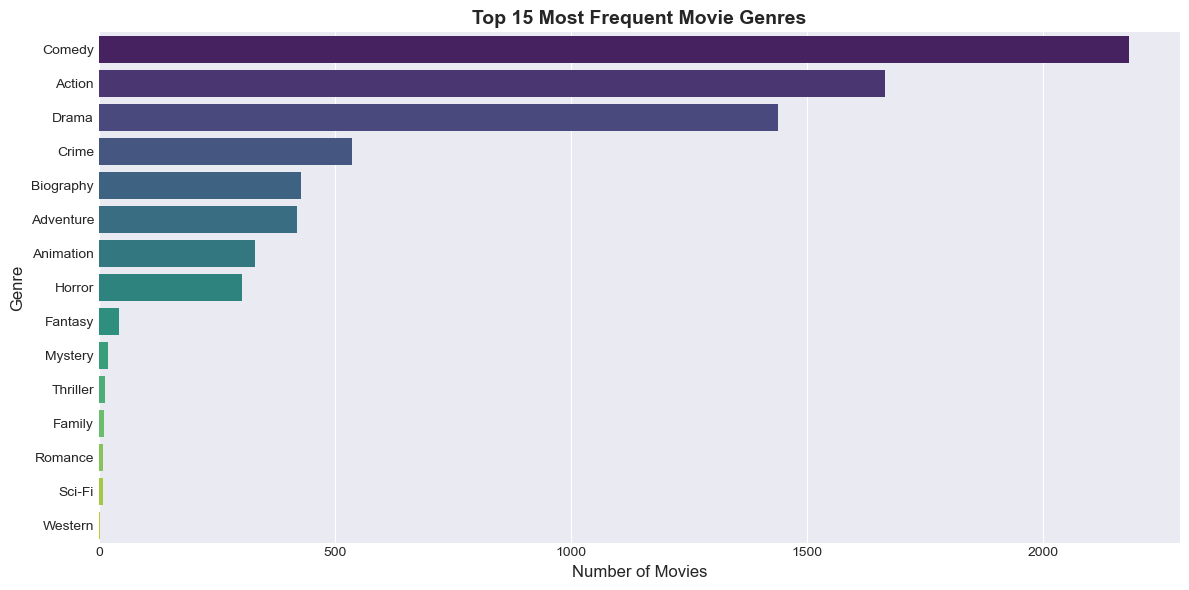

In [13]:
# Identify genre column
genre_col = None
for col in data.columns:
    if 'genre' in col.lower():
        genre_col = col
        break

if genre_col:
    print(f"Genre Analysis (Column: '{genre_col}'):")
    print("=" * 100)
    
    # Extract individual genres from multi-genre entries
    # Genres are typically separated by commas, pipes, or slashes
    all_genres = []
    
    for genres in data[genre_col].dropna():
        if isinstance(genres, str):
            # Split by common separators
            genre_list = genres.replace('|', ',').replace('/', ',').split(',')
            # Clean and add to list
            all_genres.extend([g.strip() for g in genre_list if g.strip()])
    
    # Count genre frequency
    genre_counts = pd.Series(all_genres).value_counts()
    
    print(f"\nTotal unique genres: {len(genre_counts)}")
    print(f"Total genre entries: {len(all_genres)}")
    print(f"\nTop 15 Most Frequent Genres:")
    print(genre_counts.head(15))
    
    # Store for later use
    genre_data = pd.DataFrame({
        'Genre': genre_counts.index,
        'Count': genre_counts.values
    })
    
    # Visualize genre distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(data=genre_data.head(15), x='Count', y='Genre', palette='viridis')
    plt.title('Top 15 Most Frequent Movie Genres', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Movies', fontsize=12)
    plt.ylabel('Genre', fontsize=12)
    plt.tight_layout()
    plt.savefig('../visualizations/genre_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
else:
    print("✗ No genre column found in the dataset")

### 6.1 Genre Performance Analysis

Genre Performance Analysis:

Genre Performance (Genres with ≥5 movies):
               Avg_Rating  Movie_Count  Avg_Revenue
primary_genre                                      
Biography            7.04          429  48311948.67
Animation            6.76          331 241356722.38
Drama                6.70         1439  39170965.23
Crime                6.68          536  39766271.11
Mystery              6.67           20 101183527.70
Family               6.54           10 215787647.60
Romance              6.50            8  23549374.88
Sci-Fi               6.39            8  32561233.25
Adventure            6.29          419 109558732.74
Action               6.21         1666 145834971.98
Comedy               6.20         2182  44526755.91
Fantasy              6.05           42  39251573.02
Thriller             6.02           12  26935259.42
Horror               5.79          304  47836758.47


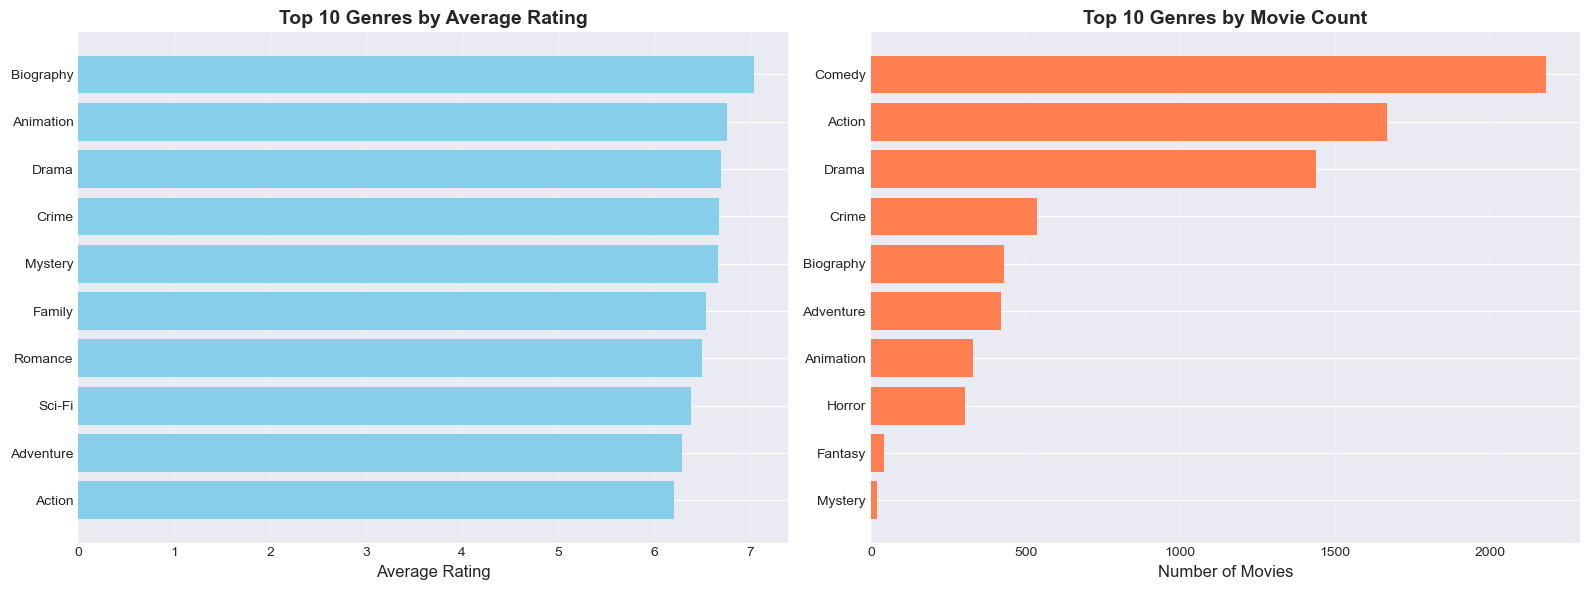

In [14]:
if genre_col and rating_col:
    print("Genre Performance Analysis:")
    print("=" * 100)
    
    # Create a mapping of movies to their primary genre (first listed)
    data['primary_genre'] = data[genre_col].apply(
        lambda x: x.split(',')[0].split('|')[0].split('/')[0].strip() if isinstance(x, str) else 'Unknown'
    )
    
    # Calculate average rating by genre
    genre_performance = data.groupby('primary_genre').agg({
        rating_col: ['mean', 'count'],
        revenue_col: 'mean' if revenue_col else rating_col
    }).round(2)
    
    # Flatten column names
    genre_performance.columns = ['Avg_Rating', 'Movie_Count', 'Avg_Revenue' if revenue_col else 'Temp']
    if not revenue_col:
        genre_performance = genre_performance.drop('Temp', axis=1)
    
    # Filter genres with at least 5 movies for statistical significance
    genre_performance = genre_performance[genre_performance['Movie_Count'] >= 5]
    genre_performance = genre_performance.sort_values('Avg_Rating', ascending=False)
    
    print("\nGenre Performance (Genres with ≥5 movies):")
    print(genre_performance.head(15))
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Average rating by genre
    top_genres = genre_performance.head(10).sort_values('Avg_Rating')
    axes[0].barh(top_genres.index, top_genres['Avg_Rating'], color='skyblue')
    axes[0].set_xlabel('Average Rating', fontsize=12)
    axes[0].set_title('Top 10 Genres by Average Rating', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)
    
    # Movie count by genre
    top_count = genre_performance.nlargest(10, 'Movie_Count').sort_values('Movie_Count')
    axes[1].barh(top_count.index, top_count['Movie_Count'], color='coral')
    axes[1].set_xlabel('Number of Movies', fontsize=12)
    axes[1].set_title('Top 10 Genres by Movie Count', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../visualizations/genre_performance.png', dpi=300, bbox_inches='tight')
    plt.show()

## 7. Relationship Analysis

Analyze correlations and relationships between features.

### 7.1 Correlation Matrix

Correlation Analysis:
Numerical columns: ['year', 'score', 'votes', 'budget', 'gross', 'runtime']


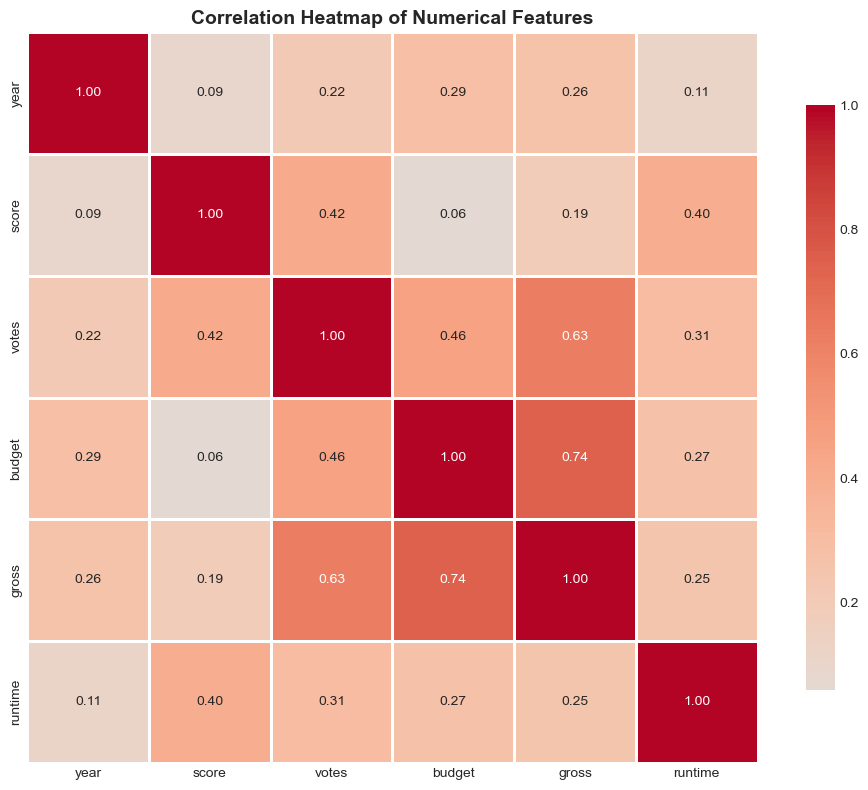


Correlation Matrix:
         year  score  votes  budget  gross  runtime
year     1.00   0.09   0.22    0.29   0.26     0.11
score    0.09   1.00   0.42    0.06   0.19     0.40
votes    0.22   0.42   1.00    0.46   0.63     0.31
budget   0.29   0.06   0.46    1.00   0.74     0.27
gross    0.26   0.19   0.63    0.74   1.00     0.25
runtime  0.11   0.40   0.31    0.27   0.25     1.00


In [15]:
# Select numerical columns for correlation analysis
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Correlation Analysis:")
print("=" * 100)
print(f"Numerical columns: {numerical_cols}")

if len(numerical_cols) >= 2:
    # Calculate correlation matrix
    correlation_matrix = data[numerical_cols].corr()
    
    # Visualize with heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Display correlation matrix
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
else:
    print("✗ Insufficient numerical columns for correlation analysis")

### 7.2 Rating vs Revenue Analysis

Rating vs Revenue Relationship:
Correlation coefficient: 0.188
Interpretation: weak positive correlation


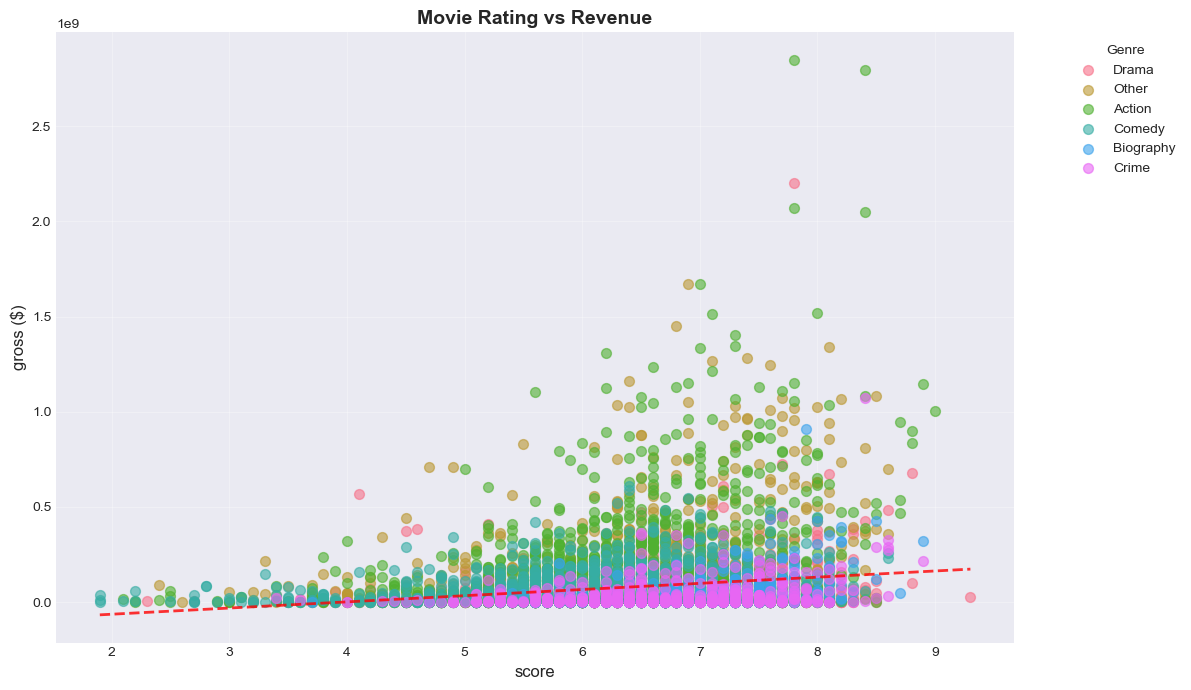

In [16]:
if rating_col and revenue_col:
    print("Rating vs Revenue Relationship:")
    print("=" * 100)
    
    # Calculate correlation
    correlation = data[rating_col].corr(data[revenue_col])
    print(f"Correlation coefficient: {correlation:.3f}")
    
    # Interpretation
    if abs(correlation) < 0.3:
        strength = "weak"
    elif abs(correlation) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
    
    direction = "positive" if correlation > 0 else "negative"
    print(f"Interpretation: {strength} {direction} correlation")
    
    # Scatter plot with genre coloring
    plt.figure(figsize=(12, 7))
    
    if 'primary_genre' in data.columns:
        # Get top 5 genres for coloring
        top_5_genres = data['primary_genre'].value_counts().head(5).index.tolist()
        data['genre_group'] = data['primary_genre'].apply(
            lambda x: x if x in top_5_genres else 'Other'
        )
        
        # Create scatter plot with genre colors
        for genre in data['genre_group'].unique():
            genre_subset = data[data['genre_group'] == genre]
            plt.scatter(genre_subset[rating_col], genre_subset[revenue_col], 
                       label=genre, alpha=0.6, s=50)
        
        plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.scatter(data[rating_col], data[revenue_col], alpha=0.6, s=50, color='steelblue')
    
    # Add trend line
    z = np.polyfit(data[rating_col].dropna(), data[revenue_col].dropna(), 1)
    p = np.poly1d(z)
    plt.plot(data[rating_col].sort_values(), p(data[rating_col].sort_values()), 
             "r--", alpha=0.8, linewidth=2, label=f'Trend (r={correlation:.2f})')
    
    plt.xlabel(f'{rating_col}', fontsize=12)
    plt.ylabel(f'{revenue_col} ($)', fontsize=12)
    plt.title('Movie Rating vs Revenue', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('../visualizations/rating_vs_revenue.png', dpi=300, bbox_inches='tight')
    plt.show()

## 8. Comprehensive Visualizations

Create detailed visualizations for distribution analysis and outlier detection.

### 8.1 Distribution Plots

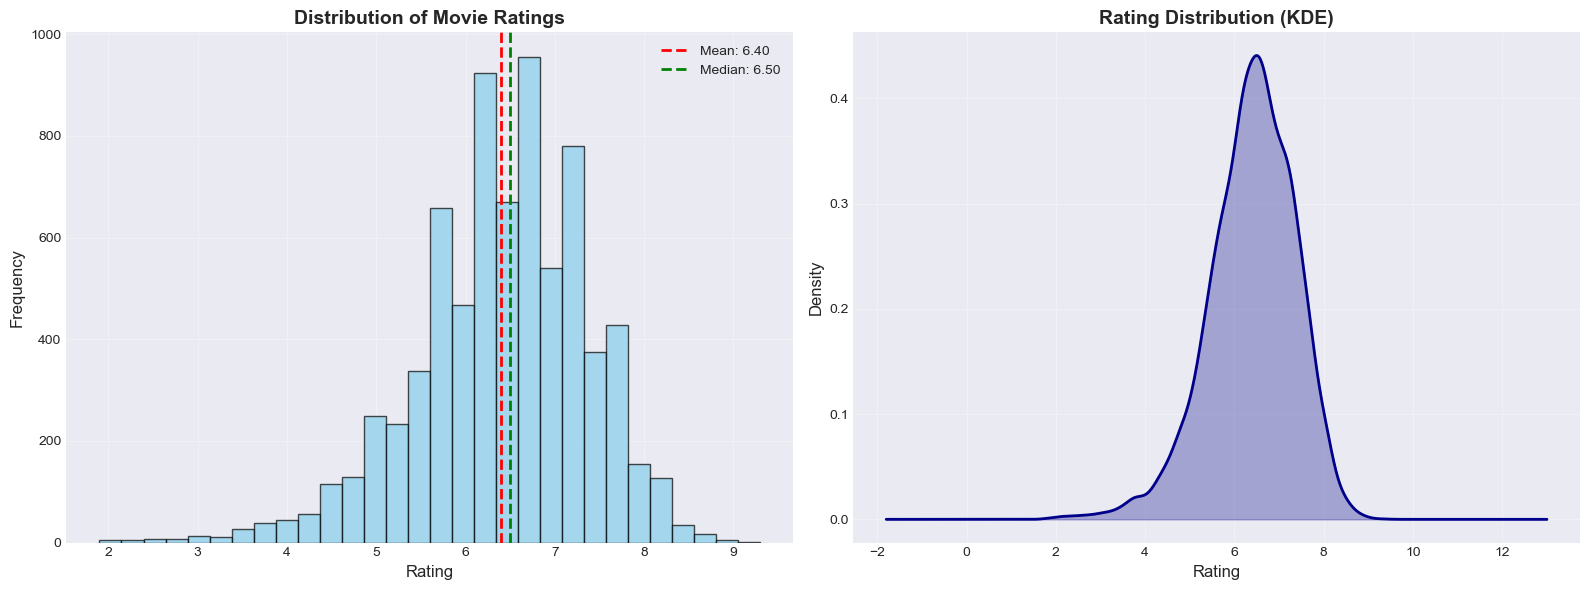

In [17]:
# Rating distribution
if rating_col:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram with KDE
    axes[0].hist(data[rating_col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[0].axvline(data[rating_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data[rating_col].mean():.2f}')
    axes[0].axvline(data[rating_col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data[rating_col].median():.2f}')
    axes[0].set_xlabel('Rating', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Movie Ratings', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # KDE plot
    data[rating_col].plot(kind='kde', ax=axes[1], linewidth=2, color='darkblue')
    line = axes[1].get_lines()[0]
    axes[1].fill_between(line.get_xdata(), line.get_ydata(), alpha=0.3, color='darkblue')
    axes[1].set_xlabel('Rating', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    axes[1].set_title('Rating Distribution (KDE)', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../visualizations/rating_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

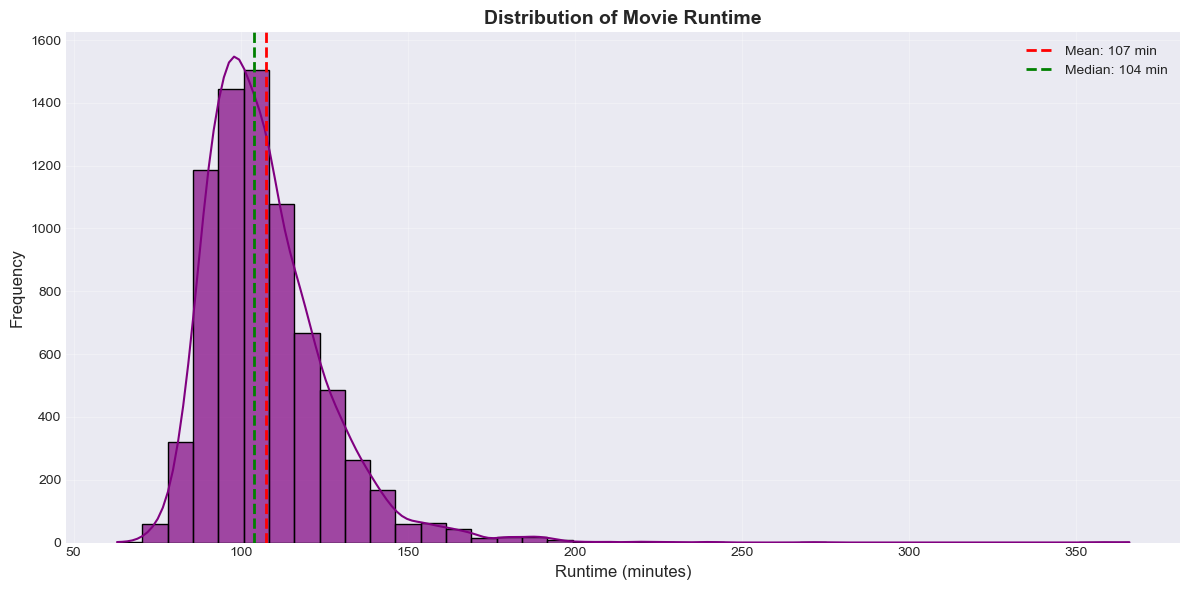

In [18]:
# Runtime distribution (if available)
runtime_col = None
for col in data.columns:
    if 'runtime' in col.lower() or 'duration' in col.lower():
        runtime_col = col
        break

if runtime_col:
    plt.figure(figsize=(12, 6))
    sns.histplot(data[runtime_col].dropna(), bins=40, kde=True, color='purple', alpha=0.7)
    plt.axvline(data[runtime_col].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {data[runtime_col].mean():.0f} min')
    plt.axvline(data[runtime_col].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Median: {data[runtime_col].median():.0f} min')
    plt.xlabel('Runtime (minutes)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Movie Runtime', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('../visualizations/runtime_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

### 8.2 Box Plots for Outlier Detection

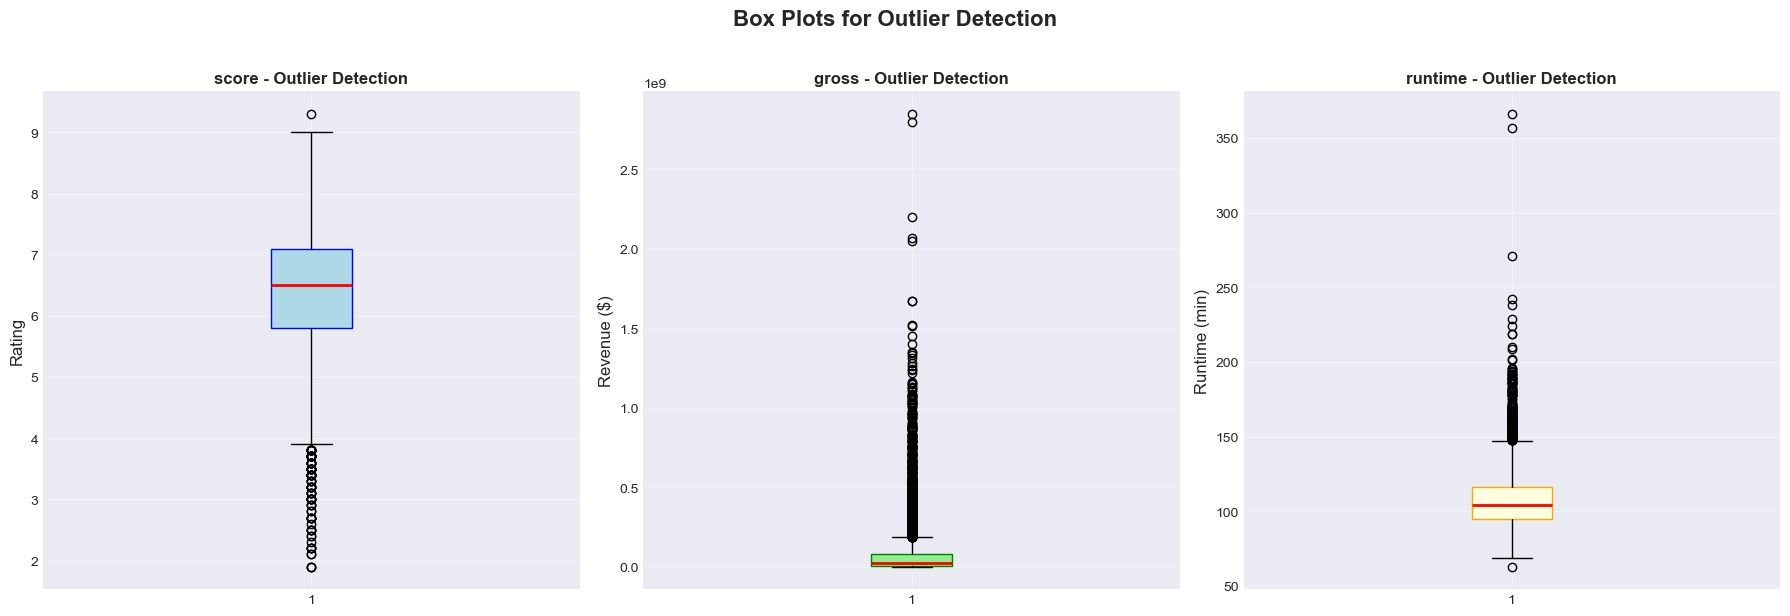

Outlier Analysis:

score:
  Q1: 5.80
  Q3: 7.10
  IQR: 1.30
  Lower Bound: 3.85
  Upper Bound: 9.05
  Outliers: 113 (1.52%)

gross:
  Q1: 4633887.75
  Q3: 76442306.75
  IQR: 71808419.00
  Lower Bound: -103078740.75
  Upper Bound: 184154935.25
  Outliers: 841 (11.35%)

runtime:
  Q1: 95.00
  Q3: 116.00
  IQR: 21.00
  Lower Bound: 63.50
  Upper Bound: 147.50
  Outliers: 228 (3.08%)


In [19]:
# Create box plots for key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Rating box plot
if rating_col:
    axes[0].boxplot(data[rating_col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red', linewidth=2))
    axes[0].set_ylabel('Rating', fontsize=12)
    axes[0].set_title(f'{rating_col} - Outlier Detection', fontsize=12, fontweight='bold')
    axes[0].grid(alpha=0.3)

# Revenue box plot
if revenue_col:
    axes[1].boxplot(data[revenue_col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', color='green'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_ylabel('Revenue ($)', fontsize=12)
    axes[1].set_title(f'{revenue_col} - Outlier Detection', fontsize=12, fontweight='bold')
    axes[1].grid(alpha=0.3)

# Runtime box plot
if runtime_col:
    axes[2].boxplot(data[runtime_col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightyellow', color='orange'),
                    medianprops=dict(color='red', linewidth=2))
    axes[2].set_ylabel('Runtime (min)', fontsize=12)
    axes[2].set_title(f'{runtime_col} - Outlier Detection', fontsize=12, fontweight='bold')
    axes[2].grid(alpha=0.3)

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../visualizations/boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate and display outlier statistics
print("Outlier Analysis:")
print("=" * 100)

for col in [rating_col, revenue_col, runtime_col]:
    if col and col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_percentage = (len(outliers) / len(data)) * 100
        
        print(f"\n{col}:")
        print(f"  Q1: {Q1:.2f}")
        print(f"  Q3: {Q3:.2f}")
        print(f"  IQR: {IQR:.2f}")
        print(f"  Lower Bound: {lower_bound:.2f}")
        print(f"  Upper Bound: {upper_bound:.2f}")
        print(f"  Outliers: {len(outliers)} ({outlier_percentage:.2f}%)")

## 9. Comprehensive Dashboard

Create a multi-panel visualization dashboard summarizing key insights.

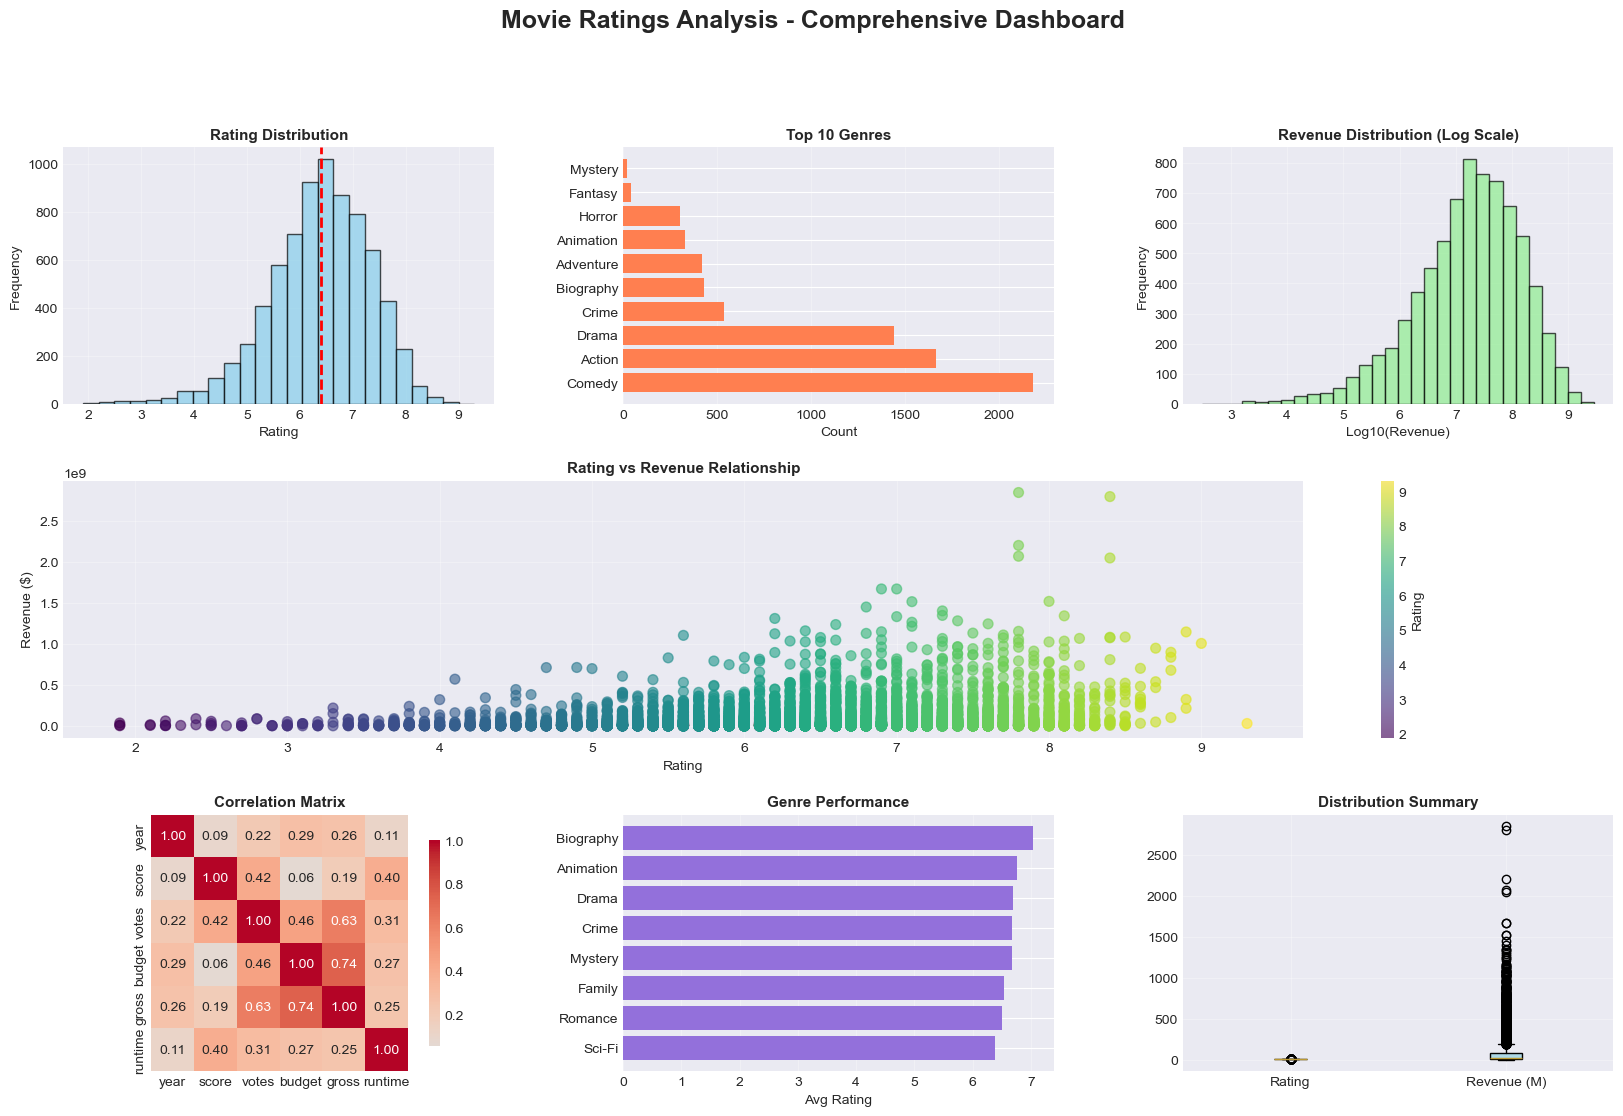


✓ Comprehensive dashboard created and saved!


In [20]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Rating Distribution
ax1 = fig.add_subplot(gs[0, 0])
if rating_col:
    ax1.hist(data[rating_col].dropna(), bins=25, edgecolor='black', alpha=0.7, color='skyblue')
    ax1.axvline(data[rating_col].mean(), color='red', linestyle='--', linewidth=2)
    ax1.set_xlabel('Rating', fontsize=10)
    ax1.set_ylabel('Frequency', fontsize=10)
    ax1.set_title('Rating Distribution', fontsize=11, fontweight='bold')
    ax1.grid(alpha=0.3)

# 2. Genre Frequency (Top 10)
ax2 = fig.add_subplot(gs[0, 1])
if genre_col and 'genre_data' in locals():
    top_10_genres = genre_data.head(10)
    # Use position-based access or check columns to avoid KeyError
    ax2.barh(top_10_genres.iloc[:, 0], top_10_genres.iloc[:, 1], color='coral')
    ax2.set_xlabel('Count', fontsize=10)
    ax2.set_title('Top 10 Genres', fontsize=11, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)

# 3. Revenue Distribution
ax3 = fig.add_subplot(gs[0, 2])
if revenue_col:
    ax3.hist(np.log10(data[revenue_col].dropna() + 1), bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
    ax3.set_xlabel('Log10(Revenue)', fontsize=10)
    ax3.set_ylabel('Frequency', fontsize=10)
    ax3.set_title('Revenue Distribution (Log Scale)', fontsize=11, fontweight='bold')
    ax3.grid(alpha=0.3)

# 4. Rating vs Revenue Scatter
ax4 = fig.add_subplot(gs[1, :])
if rating_col and revenue_col:
    scatter = ax4.scatter(data[rating_col], data[revenue_col], 
                         c=data[rating_col], cmap='viridis', alpha=0.6, s=50)
    ax4.set_xlabel('Rating', fontsize=10)
    ax4.set_ylabel('Revenue ($)', fontsize=10)
    ax4.set_title('Rating vs Revenue Relationship', fontsize=11, fontweight='bold')
    ax4.grid(alpha=0.3)
    plt.colorbar(scatter, ax=ax4, label='Rating')

# 5. Correlation Heatmap
ax5 = fig.add_subplot(gs[2, 0])
if len(numerical_cols) >= 2:
    corr_subset = data[numerical_cols].corr()
    sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, ax=ax5, cbar_kws={"shrink": 0.8})
    ax5.set_title('Correlation Matrix', fontsize=11, fontweight='bold')

# 6. Genre Performance
ax6 = fig.add_subplot(gs[2, 1])
if 'genre_performance' in locals():
    top_genre_perf = genre_performance.head(8).sort_values('Avg_Rating')
    ax6.barh(top_genre_perf.index, top_genre_perf['Avg_Rating'], color='mediumpurple')
    ax6.set_xlabel('Avg Rating', fontsize=10)
    ax6.set_title('Genre Performance', fontsize=11, fontweight='bold')
    ax6.grid(axis='x', alpha=0.3)

# 7. Box Plot Summary
ax7 = fig.add_subplot(gs[2, 2])
if rating_col and revenue_col:
    box_data = [data[rating_col].dropna(), data[revenue_col].dropna() / 1e6]  # Revenue in millions
    ax7.boxplot(box_data, labels=['Rating', 'Revenue (M)'], patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    ax7.set_title('Distribution Summary', fontsize=11, fontweight='bold')
    ax7.grid(alpha=0.3)

# Main title
fig.suptitle('Movie Ratings Analysis - Comprehensive Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('../visualizations/comprehensive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comprehensive dashboard created and saved!")

## 10. Data Export for Power BI

Export cleaned data and analysis results for Power BI dashboard creation.

In [21]:
# Export cleaned dataset
print("Exporting data for Power BI:")
print("=" * 100)

# Main cleaned dataset
export_path = '../data/cleaned/movies_cleaned.csv'
data.to_csv(export_path, index=False)
print(f"✓ Cleaned dataset exported to: {export_path}")
print(f"  - Rows: {len(data):,}")
print(f"  - Columns: {len(data.columns)}")

# Export genre analysis
if 'genre_data' in locals():
    genre_export_path = '../data/cleaned/genre_analysis.csv'
    genre_data.to_csv(genre_export_path, index=False)
    print(f"\n✓ Genre analysis exported to: {genre_export_path}")

# Export genre performance
if 'genre_performance' in locals():
    genre_perf_path = '../data/cleaned/genre_performance.csv'
    genre_performance.to_csv(genre_perf_path)
    print(f"✓ Genre performance exported to: {genre_perf_path}")

# Export summary statistics
summary_stats = data.describe(include='all').T
summary_path = '../data/cleaned/summary_statistics.csv'
summary_stats.to_csv(summary_path)
print(f"✓ Summary statistics exported to: {summary_path}")

print("\n✓ All data exported successfully for Power BI!")

Exporting data for Power BI:
✓ Cleaned dataset exported to: ../data/cleaned/movies_cleaned.csv
  - Rows: 7,412
  - Columns: 17

✓ Genre analysis exported to: ../data/cleaned/genre_analysis.csv
✓ Genre performance exported to: ../data/cleaned/genre_performance.csv
✓ Summary statistics exported to: ../data/cleaned/summary_statistics.csv

✓ All data exported successfully for Power BI!


## 11. Key Insights & Conclusions

Summary of findings from the analysis.

In [22]:
print("=" * 100)
print("KEY INSIGHTS & CONCLUSIONS")
print("=" * 100)

insights = []

# Dataset overview
insights.append(f"1. DATASET OVERVIEW")
insights.append(f"   - Total movies analyzed: {len(data):,}")
insights.append(f"   - Features analyzed: {len(data.columns)}")
insights.append(f"   - Data quality: {((1 - data.isnull().sum().sum() / (len(data) * len(data.columns))) * 100):.1f}% complete")

# Rating insights
if rating_col:
    insights.append(f"\n2. RATING ANALYSIS")
    insights.append(f"   - Average rating: {data[rating_col].mean():.2f}")
    insights.append(f"   - Median rating: {data[rating_col].median():.2f}")
    insights.append(f"   - Rating range: {data[rating_col].min():.2f} - {data[rating_col].max():.2f}")
    insights.append(f"   - Standard deviation: {data[rating_col].std():.2f}")

# Revenue insights
if revenue_col:
    insights.append(f"\n3. REVENUE ANALYSIS")
    insights.append(f"   - Total revenue: ${data[revenue_col].sum():,.0f}")
    insights.append(f"   - Average revenue: ${data[revenue_col].mean():,.0f}")
    insights.append(f"   - Median revenue: ${data[revenue_col].median():,.0f}")
    insights.append(f"   - Highest grossing: ${data[revenue_col].max():,.0f}")

# Genre insights
if 'genre_data' in locals():
    insights.append(f"\n4. GENRE ANALYSIS")
    insights.append(f"   - Total unique genres: {len(genre_data)}")
    insights.append(f"   - Most common genre: {genre_data.iloc[0, 0]} ({genre_data.iloc[0, 1]} movies)")
    if 'genre_performance' in locals() and len(genre_performance) > 0:
        best_genre = genre_performance.index[0]
        best_rating = genre_performance.iloc[0, 0]
        insights.append(f"   - Highest rated genre: {best_genre} (avg: {best_rating:.2f})")

# Correlation insights
if rating_col and revenue_col:
    correlation = data[rating_col].corr(data[revenue_col])
    insights.append(f"\n5. RELATIONSHIP ANALYSIS")
    insights.append(f"   - Rating-Revenue correlation: {correlation:.3f}")
    if abs(correlation) < 0.3:
        interpretation = "weak correlation - ratings don't strongly predict revenue"
    elif abs(correlation) < 0.7:
        interpretation = "moderate correlation - some relationship exists"
    else:
        interpretation = "strong correlation - ratings are good revenue predictors"
    insights.append(f"   - Interpretation: {interpretation}")

# Print all insights
for insight in insights:
    print(insight)

print("\n" + "=" * 100)
print("ANALYSIS COMPLETE")
print("=" * 100)
print("\n✓ All visualizations saved to: ../visualizations/")
print("✓ Cleaned data exported to: ../data/cleaned/")
print("✓ Ready for Power BI dashboard creation")
print("\nNext Steps:")
print("1. Open Power BI Desktop")
print("2. Import: ../data/cleaned/movies_cleaned.csv")
print("3. Create interactive visualizations")
print("4. Add filters and slicers for Genre, Year, Rating")
print("5. Design executive-friendly layout")

KEY INSIGHTS & CONCLUSIONS
1. DATASET OVERVIEW
   - Total movies analyzed: 7,412
   - Features analyzed: 17
   - Data quality: 100.0% complete

2. RATING ANALYSIS
   - Average rating: 6.40
   - Median rating: 6.50
   - Rating range: 1.90 - 9.30
   - Standard deviation: 0.96

3. REVENUE ANALYSIS
   - Total revenue: $585,500,211,532
   - Average revenue: $78,993,553
   - Median revenue: $20,403,522
   - Highest grossing: $2,847,246,203

4. GENRE ANALYSIS
   - Total unique genres: 18
   - Most common genre: Comedy (2182 movies)
   - Highest rated genre: Biography (avg: 7.04)

5. RELATIONSHIP ANALYSIS
   - Rating-Revenue correlation: 0.188
   - Interpretation: weak correlation - ratings don't strongly predict revenue

ANALYSIS COMPLETE

✓ All visualizations saved to: ../visualizations/
✓ Cleaned data exported to: ../data/cleaned/
✓ Ready for Power BI dashboard creation

Next Steps:
1. Open Power BI Desktop
2. Import: ../data/cleaned/movies_cleaned.csv
3. Create interactive visualizations
4

---

## Project Completion

This notebook has successfully completed:

✅ Data loading and exploration  
✅ Comprehensive data cleaning  
✅ Statistical analysis  
✅ Genre-based insights  
✅ Relationship analysis  
✅ Professional visualizations  
✅ Data export for Power BI  

**Next:** Create Power BI dashboard using the exported data files.

---

*Task 2 - Data Science Internship at Hex Softwares*